In [106]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv(r"C:\Users\Ashraful\Documents\Machine Learning\Linear Regression\nasdaq100.csv", sep=';')

In [17]:
df.head()

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700


In [21]:
df.isnull().sum()

Date              0
Starting (USD)    0
Ending (USD)      0
dtype: int64

In [23]:
df = df.drop('Date', axis=1)

In [25]:
df.head()

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700


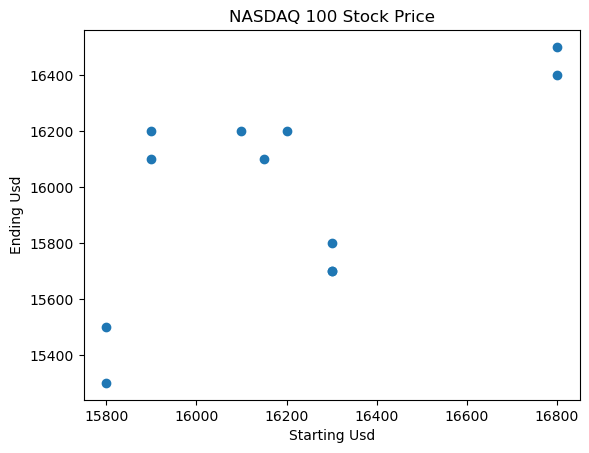

In [27]:
plt.scatter(df['Starting (USD)'], df['Ending (USD)'])
plt.xlabel('Starting Usd')
plt.ylabel('Ending Usd')
plt.title('NASDAQ 100 Stock Price')
plt.show()

In [33]:
x = df.drop('Ending (USD)', axis =1)
x.head()

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300


In [39]:
y = df[['Ending (USD)']]
y.head()

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700


# Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression

In [44]:
reg = LinearRegression()

In [46]:
x.mean()

Starting (USD)    16195.833333
dtype: float64

In [48]:
y.mean()

Ending (USD)    15975.0
dtype: float64

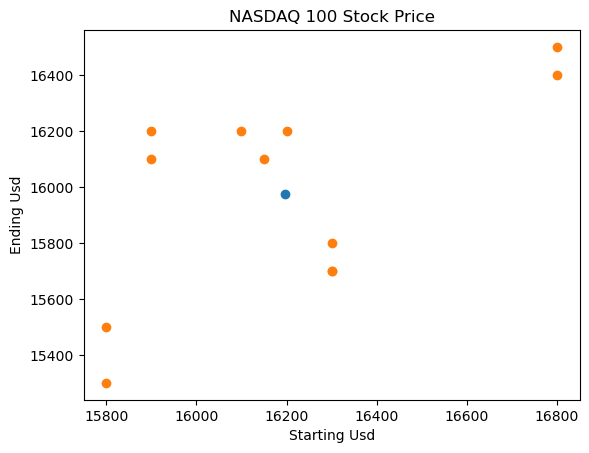

In [54]:
plt.scatter(x.mean(), y.mean())
plt.scatter(df['Starting (USD)'], df['Ending (USD)'])
plt.xlabel('Starting Usd')
plt.ylabel('Ending Usd')
plt.title('NASDAQ 100 Stock Price')
plt.show()

In [58]:
reg.fit(x, y)  # train the ml model

LinearRegression()

In [68]:
m = reg.coef_
m

array([[0.65258293]])

In [70]:
c = reg.intercept_
c

array([5405.87555702])

In [76]:
reg.predict([[16700]])

C:\Users\Ashraful\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16304.0105628]])

In [82]:
df['Predicted_y'] = reg.predict(x)
df

,Starting (USD),Ending (USD),Predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389
5,16800,16400,16369.268856
6,15900,16200,15781.944215
7,15800,15500,15716.685922
8,16150,16100,15945.089949
9,16300,15800,16042.977389


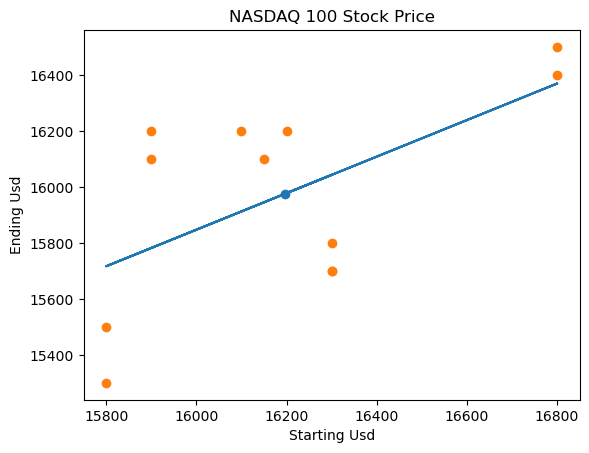

In [80]:
plt.plot(x, reg.predict(x))
plt.scatter(x.mean(), y.mean())
plt.scatter(df['Starting (USD)'], df['Ending (USD)'])
plt.xlabel('Starting Usd')
plt.ylabel('Ending Usd')
plt.title('NASDAQ 100 Stock Price')
plt.show()

# Loss & Cost function

In [85]:
df['Loss'] = df['Ending (USD)'] - df['Predicted_y']

In [87]:
df

,Starting (USD),Ending (USD),Predicted_y,Loss
0,16800,16500,16369.268856,130.731144
1,15900,16100,15781.944215,318.055785
2,15800,15300,15716.685922,-416.685922
3,16100,16200,15912.460802,287.539198
4,16300,15700,16042.977389,-342.977389
5,16800,16400,16369.268856,30.731144
6,15900,16200,15781.944215,418.055785
7,15800,15500,15716.685922,-216.685922
8,16150,16100,15945.089949,154.910051
9,16300,15800,16042.977389,-242.977389


In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [91]:
mse = mean_squared_error(df['Ending (USD)'], df['Predicted_y'])
mse

80411.23397700385

In [95]:
mae = mean_absolute_error(df['Ending (USD)'], df['Predicted_y'])
mae

260.3840017604666

In [97]:
reg.score(x, y)

0.3577804940272571

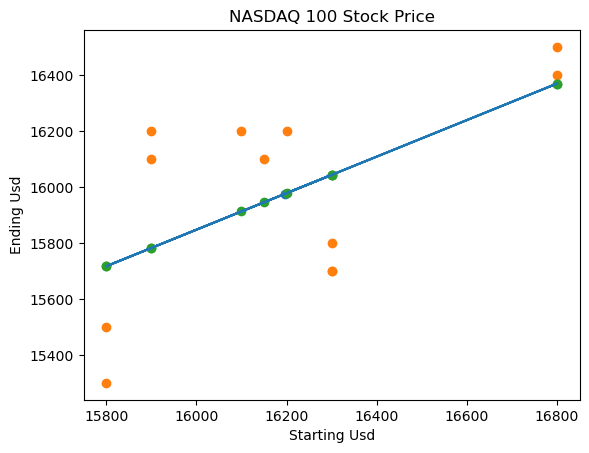

In [99]:
plt.plot(x, reg.predict(x))
plt.scatter(x.mean(), y.mean())
plt.scatter(df['Starting (USD)'], df['Ending (USD)'])
plt.scatter(df['Starting (USD)'], reg.predict(x))
plt.xlabel('Starting Usd')
plt.ylabel('Ending Usd')
plt.title('NASDAQ 100 Stock Price')
plt.show()

# R-Squared Value

In [102]:
from sklearn.metrics import r2_score

In [104]:
 r2_score(y, reg.predict(x))

0.3577804940272571